# A Simple Catcher CNN Demo
We first need to import the entire X library by adding the super folder and then importing the right keras libraries

In [1]:
import os, sys
sys.path.append(os.path.join('..'))

In [2]:
import keras.backend as K
K.set_image_dim_ordering('th') # needs to be set since it defaults to tensorflow now
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import SGD

from x.environment import Catcher
from x.models import KerasModel
from x.memory import ExperienceReplay
from x.agent import DiscreteAgent

Using TensorFlow backend.


# Setup Game
Here we setup the game and training settings

In [ ]:
num_actions = 3
nb_filters, nb_rows, nb_cols = 32, 3, 3
grid_x, grid_y = 11, 11
epoch = 100
batch = 50
memory_len = 500
gamma = 0.9
epsilon = 0.1

# Catcher Model
Here is the model we train for catching

In [3]:
# keras model
keras_model = Sequential()
keras_model.add(Convolution2D(nb_filters, nb_rows, nb_cols, input_shape=(1, grid_x, grid_y), activation='relu', subsample=(2, 2)))
keras_model.add(Convolution2D(nb_filters, nb_rows, nb_cols, activation='relu'))
keras_model.add(Convolution2D(num_actions, nb_rows, nb_cols))
keras_model.add(MaxPooling2D(keras_model.output_shape[-2:]))
keras_model.add(Flatten())

# X wrapper for Keras
model = KerasModel(keras_model)

# Memory
M = ExperienceReplay(memory_length=memory_len)

# Agent
A = DiscreteAgent(model, M)
# SGD optimizer + MSE cost + MAX policy = Q-learning as we know it
A.compile(optimizer=SGD(lr=0.2), loss="mse", policy_rule="max")

# To run an experiment, the Agent needs an Enviroment to iteract with
catcher = Catcher(grid_size=grid_x, output_shape=(1, grid_x, grid_y))
A.learn(catcher, epoch=epoch, batch_size=batch)

/Users/mader/anaconda/lib/python3.5/site-packages/keras/engine/topology.py:368: UserWarning: The `regularizers` property of layers/models is deprecated. Regularization losses are now managed via the `losses` layer/model property.
  warnings.warn('The `regularizers` property of '


Learning started!
[Environment]: Catch game with grid size 11
[Model]: Keras Model 
	 Optimizer: <keras.optimizers.SGD object at 0x11a750b70> 
	 Loss: <function mean_squared_error at 0x11a5fec80> 
	 Policy: <x.policies.Max object at 0x11a75cef0>
[Memory]: Experience Replay 
	 Memory length: 500
100/100 [==============================] - 46s - loss: 0.5304 - rewards: -0.1600    


# Test the agent 
Here we follow the learned policy

In [4]:
out_dir = 'rl_dir'
if not os.path.exists(out_dir): os.mkdir(out_dir)
A.play(catcher, epoch=100, visualize={'filepath': os.path.join(out_dir, 'demo.gif'), 'n_frames': 270, 'gray': True})

Free play started!
100/100 [==============================] - 1s - loss: 0.0000e+00 - rewards: -0.2200     
Making gif!
See your gif at rl_dir/demo.gif


# Show Playing
Here we show the playing in the notebook using HTML rendering of the animated GIF


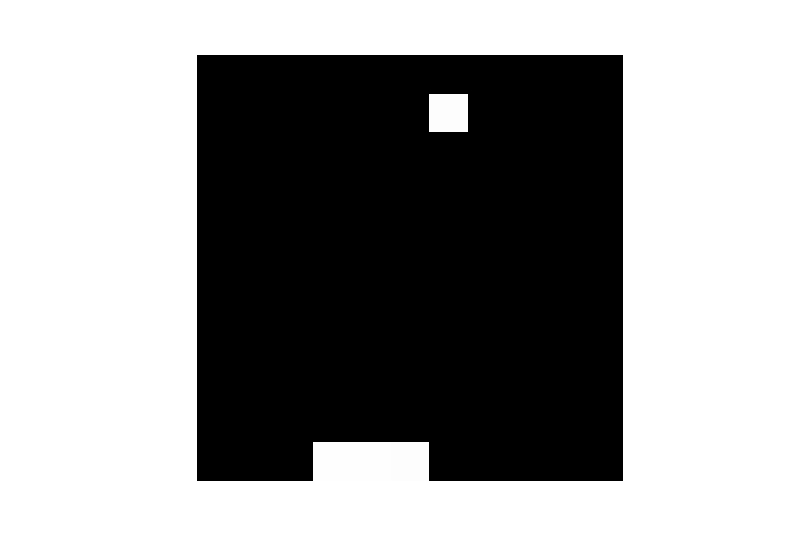

In [6]:
from IPython.display import HTML
import base64
with open(os.path.join(out_dir, 'demo.gif'), 'rb') as in_file:
    data_str = base64.b64encode(in_file.read()).decode("ascii").replace("\n", "")
data_uri = "data:image/png;base64,{0}".format(data_str)
HTML("""<img src="{0}" width = "256px" height = "256px" />""".format(data_uri))